Introductory Summary: Creation of multiple Machine Learning models

1. Creation of a dummy regressor to compare the eventual Linear Regression and Random Forest models with the mean
2. Creation of linear model(LR) and relevant performance metrics
3. Creation of Statmodel's OLS method for LR
4. Instantiation of pipeline, cross validation, and gridsearchCV to optimize the LR model
5. Creation of the Random Forest model (within pipeline)
6. Evaluation of Random Forest vs Linear Regression Model's performance metrics
- The Random Forest Model performs better vs Linear Regression on all metrics
7. Creation of the Random Forest model (without use of pipeline)
- For reasons unknown, my Random Forest performs better when not fitted within a pipeline
8. Creation of Gradient Boost Regressor Model
- Gradient Boost does not perform as well as Random Forest
9. Creation of KNN regressor Model
- KNN does not perform as well as Random Forest
10. Overall Analysis
- Random Forest model, and its features, are the most reliable model to predict feature importance towards price

Caveats
1. I do not understand the irrational coefficients of my linear regression model
2. I do not understand why Random Forest (within a pipeline) vs Random Forest without pipeline produces slightly different results


Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import __version__ as sklearn_version
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
import datetime
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
pd.set_option('display.max_columns', None)

In [5]:
os.getcwd()

'C:\\Users\\Mark Lee\\Documents\\GitHub\\Datasets\\Airbnb Prices Europe\\CSV'

<font size ="3">
    
Importing Train_Test_Splitted DataFrames from previous capstone

In [4]:
x_train = pd.read_csv('x_train.csv', index_col=0)
x_test = pd.read_csv('x_test.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)

In [7]:
x_train.head()

,Person Capacity,cleanliness_rating,guest satis rating,bedrooms,dist,metro_dist,attr_index,Rest Index,GDP (B USD),Population,Pop Density (ppl/km2),GDP per capita,Room Type_Private room,Room Type_Shared room,Shared Room_True,Private Room_True,Superhost?_True,Multi Listing?_1,Biz Listing?_1,Weekday/Weekend_weekends,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,Country_England,Country_France,Country_Germany,Country_Greece,Country_Hungary,Country_Italy,Country_Portugal,Country_Spain
32058,4.0,10.0,99.0,1,4.662501,0.194882,222.509535,457.437738,934.0,2206488,20934.421252,423.297113,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
9562,2.0,10.0,96.0,1,4.772191,1.169283,66.415013,87.751825,243.0,3711930,4162.756532,65.464597,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7080,2.0,9.0,91.0,1,1.975318,0.361418,454.981524,623.412553,173.0,1620809,15984.309665,106.736821,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
24470,2.0,7.0,69.0,0,6.018708,0.390966,211.220940,491.882753,978.0,8825000,14538.714992,110.821530,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
38021,2.0,9.0,84.0,1,0.291507,0.418491,429.926437,1112.665881,166.0,2868782,2232.515175,57.864278,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0


<font size="4">

Because I've only imported unscaled/unnormalized dataframes from the previous capstone, I am performing StandardScaler on the dataframes again for the below steps



In [7]:
#Initializing and performing StandardScaler on the appropriate dataframes/datapoints
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [8]:
x_test_scaled = scaler.transform(x_test)

<font size="4"> Creating a dummy regressor model for comparison with eventual linear regression model later on

In [16]:
#Initializing and fitting the DummyRegressor to the training dataset
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(x_train_scaled, y_train)
dumb_reg.constant_

array([[243.17284581]])

In [17]:
#Comparing DummyRegressor to y_train's mean (they should be the same)
y_train.mean()

Price    243.172846
dtype: float64

In [98]:
#Using the model to predict the target datapoints of x_train_scaled (which should equal the mean of y_train)
y_tr_pred_dummy = dumb_reg.predict(x_train_scaled)
y_tr_pred_dummy[:5]

array([243.17284581, 243.17284581, 243.17284581, 243.17284581,
       243.17284581])

In [99]:
#Calculating the R squared of dummy regressor
r2_score(y_train, y_tr_pred_dummy)

0.0

In [100]:
#Calculating these performance metrics for eventual comparison to linear regression model
mean_absolute_error(y_train, y_tr_pred_dummy), mean_squared_error(y_train, y_tr_pred_dummy)

(105.21345004024374, 19888.901141562557)

<font size="4">
As expected, the dummy regressor R squared result equals 0. This is because the dummy regressor equates to deriving the mean of the y_train datapoints, and as such, regressing the fitted model against the y_train mean should equate to 0

<font size="4">
The below steps initiate and construct the Linear Regression model that forms the core of this analysis

In [21]:
#Initializing Linear Regression model
rModel = linear_model.LinearRegression()

In [22]:
#Fitting model onto the scaled x and y datapoints in the training set
rModel.fit(x_train_scaled, y_train)

LinearRegression()

In [23]:
y_tr_pred = rModel.predict(x_train_scaled)

<font size="4">
Let's compute the efficacy of the recently fitted linear regression model

In [101]:
#Calculating R squared for training model (scaled)
rModel.score(x_train_scaled, y_train)

0.5576463538739653

In [102]:
#Calculating R squared using r2_score method
r2_score(y_train, y_tr_pred)

0.5576463538739653

In [103]:
#For personal curiosity, just running rModel.score() on (unscaled) x_train datapoints to see the R squared for this non-scaled model
rModel.score(x_train, y_train)

C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


-8.420431203986078e+36

<font size="3">
    
Given the chaotic nature of the pairplots (in the EDA stage), the scaling/normalization distortions caused by utilizing StandardScaler on non-normal distributed datapoints, and coupled with the non-parametric underlying data distributions for each feature, I'm quite surprised by the R squared result of 55%. Although the current variables only explain 55% of residual variances, the model's predictive capabilities perform much higher vs expectations from visual inspection of the fragmented data distributions and relationships during EDA, where no correlations between any two variables existed above 15%. This output highlights the beauty of multi-variate linear regressions in unearthing patterns and optimizing variable relationships beneath seemingly uncorrelated data.

Note 1: The model doesn't differentiate between Airbnb price segments and the varying factors/pertinent gradient dynamics towards respective Airbnb price segements. For instance, consumer psychology and pricing dynamics towards luxury vs economy segments should differ dramatically. Similarly, bimodal (or even tri-modal) distributions may more accurately describe the underlying data, whereas, this model mapped the regression model over an assumed idealized normal distribution. These multitudes of confounding variables further signify the impressiveness of the 55% output. 

Note 2: Every cities datapoints are aggregated into one complete dataset and regressed into one linear regression model. In future studies, independent linear regressions for each respective city should be performed to produce better models. With this in mind, aggregating all cities into one linear regression model may also contribute significantly to the divergences around the regression line (for different cities may be more expensive or cheaper for the same features)

Next step: let's utilize the previous fitted linear regression model to predict target variables based for the test dataset

In [104]:
#Predicting the target prices by fitting the previous model onto the x_test (scaled) datapoints
y_te_pred = rModel.predict(x_test_scaled)

In [105]:
#Calculating R squared on the y_pred vs y_test datapoints
rModel.score(x_test_scaled, y_test)

0.5528434841648482

In [106]:
#Calculating R squared on the test data predictions vs actual using the r2_score method
r2_score(y_test, y_te_pred)

0.5528434841648482

<font size="3">
    
The resulting R squared (55.28%) of the predictive model is actually quite similar to the training models R squared output (55.74%) indicating that model overfitting isn't an issue.

Let's visualize the predicted datapoints vs the actual price data for the test datapoints

Text(0, 0.5, 'Predicted Prices')

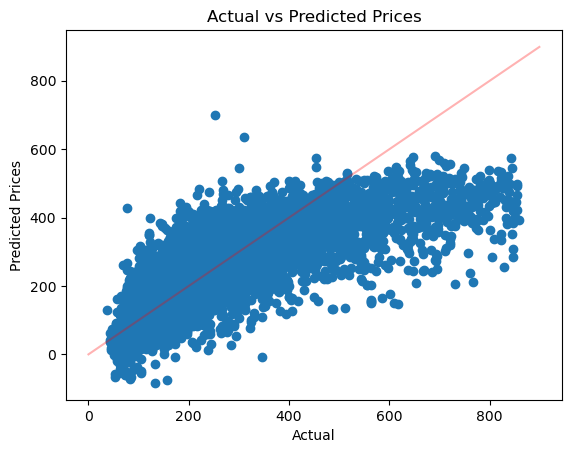

In [107]:
#Plotting y_test vs y_pred to see how well the predictions match the results
#Also plotting idealized regression line to easily visualize optimal results
plt.scatter(y_test, y_te_pred)
plt.plot(range(0, 900), range(0,900), color='red', alpha=.3)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual')
plt.ylabel('Predicted Prices')

<font size="3">
    
The scatterplot manifests a postive correlation between predicted vs actual datapoints, but this correlation remains disparate - i.e descrepancies around the regression line. The largest mean variance centers around the $220 price point, including the largest outliers. These deviations around the regression line indicate that many undiscovered variables towards Airbnb price prediction remain that account for these descrepancies.

Let's investigate other metrics to describe model efficacy

In [108]:
#Calculating Mean Absolute Error
mean_absolute_error(y_test, y_te_pred)

69.04017008755508

The Mean Absolute Error (MAE) signals, on average, the model predictions are off by ~$69 

In [109]:
#Calculating Mean Squared Error
mse = mean_squared_error(y_test, y_te_pred)
mse

9173.440559916726

In [110]:
np.sqrt(mse)

95.77807974644682

<font size ="4">

Let's construct an alternative method to construct a Linear Regression model via Statsmodel's (sm) Ordinary Least Squares

Also of note: I'm forced to import a Dataframe from the previous case study, because my current x_train/x_test DF's do not have an added constant for the OLS method. I have to import the previous DF and add the constant (using sm.add_constant) before train_test_split, which are performed in the steps below.

In [34]:
#Importing previous Dataframe to modify it for the OLS model

df3 = pd.read_csv('df3.csv', index_col=0)

In [35]:
#Creating X and Y variables below for train-test-split
X = df3.drop('Price', axis=1)

In [36]:
y = df3.Price

In [37]:
#Adding constant to x for OLS model
X1 = sm.add_constant(X)

In [38]:
#I'm adding the addendum, "2", to each variable here to distinguish from the previous train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y, test_size=.2, random_state=45)

In [39]:
# Create the model
rModel2 = sm.OLS(y_train2, X_train2)

# Fit the model with fit() 
rModel2_results = rModel2.fit()

In [40]:
#Evaluating the fitted model
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     2228.
Date:                Thu, 21 Sep 2023   Prob (F-statistic):               0.00
Time:                        12:40:40   Log-Likelihood:            -2.3225e+05
No. Observations:               38941   AIC:                         4.645e+05
Df Residuals:                   38918   BIC:                         4.647e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -21.4159      0.929    -23.044      0.000     -23.237     -19.594
Person Capacity             23.7959      0.529     44.959      0.000      22.759      24.833
cleanliness_rating           8.3549      0.719     11.627      0.000       6.946       9.763
guest satis rating           0.0695      0.078      0.889      0.374      -0.084       0.223
bedrooms                    36.3544      0.976     37.249      0.000      34.441      38.267
dist                        -4.7907      0.349    -13.712      0.000      -5.475      -4.106
metro_dist                  -4.7428      0.725     -6.539      0.000      -6.164      -3.321
attr_index                   0.0910      0.004     21.285      0.000       0.083       0.099
Rest Index                   0.0264      0.002     11.947      0.000       0.022       0.031
GDP (B USD)                  0.1051      0.018      5.817      0.000       0.070       0.141
Population               -2.597e-06   2.04e-06     -1.271      0.204    -6.6e-06    1.41e-06
Pop Density (ppl/km2)        0.0090      0.000     46.391      0.000       0.009       0.009
GDP per capita              -0.3057      0.035     -8.692      0.000      -0.375      -0.237
Room Type_Private room     -47.8669      0.646    -74.124      0.000     -49.133     -46.601
Room Type_Shared room      -88.3754      2.879    -30.695      0.000     -94.019     -82.732
Shared Room_True           -88.3754      2.879    -30.695      0.000     -94.019     -82.732
Private Room_True          -47.8669      0.646    -74.124      0.000     -49.133     -46.601
Superhost?_True              2.3033      1.173      1.964      0.049       0.005       4.601
Multi Listing?_1            16.5587      1.236     13.394      0.000      14.136      18.982
Biz Listing?_1              33.4831      1.242     26.962      0.000      31.049      35.917
Weekday/Weekend_weekends     6.2279      0.956      6.513      0.000       4.354       8.102
city_barcelona             -10.6034      0.482    -22.012      0.000     -11.548      -9.659
city_berlin                 47.1775      0.995     47.437      0.000      45.228      49.127
city_budapest              -33.8047      1.006    -33.617      0.000     -35.776     -31.834
city_lisbon                 20.7236      1.141     18.165      0.000      18.487      22.960
city_london                 -7.9818      0.444    -17.980      0.000      -8.852      -7.112
city_paris                   2.8048      0.376      7.457      0.000       2.068       3.542
city_rome                  -19.2867      0.834    -23.125      0.000     -20.921     -17.652
city_vienna                 20.3374      1.758     11.567      0.000      16.891      23.784
Country_England             -7.9818      0.444    -17.980      0.000      -8.852      -7.112
Country_France

In [41]:
rModel2_results.params.sort_values(ascending=False)

Country_Germany             47.177504
city_berlin                 47.177504
bedrooms                    36.354390
Biz Listing?_1              33.483121
Person Capacity             23.795911
city_lisbon                 20.723601
Country_Portugal            20.723601
city_vienna                 20.337364
Multi Listing?_1            16.558693
cleanliness_rating           8.354936
Weekday/Weekend_weekends     6.227904
Country_France               2.804751
city_paris                   2.804751
Superhost?_True              2.303259
GDP (B USD)                  0.105096
attr_index                   0.090958
guest satis rating           0.069548
Rest Index                   0.026395
Pop Density (ppl/km2)        0.008963
Population                  -0.000003
GDP per capita              -0.305668
metro_dist                  -4.742789
dist                        -4.790663
city_london                 -7.981769
Country_England             -7.981769
Country_Spain              -10.603354
city_barcelo

<font size="3">
    
Because the Ordinary Least Squares method is the same loss function used to compute the regression in the previous Linear Regression model, it's no surprise that the outputed R squared is identical.

The Statsmodel OLS method also prints a more detailed analysis of the modeled coefficients. One can easily discern the most signficant (postive or negative ) features towards price prediction
- It's no surprise that bedroom and person capacity are the biggest (non-geographic) indicators toward price increases. 
- However, surprisingly, distance from metro (and other distance-related metrics) figure little into AirBnb price increases. This may be due to the fact that consumers price AirBnb room towards valuable attractions and not towards distance to metros. Furthermore, in certain cities, public transportation may play a minimal role in transportation logistics.  
- Biz Listing: This feature is the most important coeficient in this analysis towards assisting future Airbnb landlord decisions.
    
However, at this point, it's still too early to conclude the logic of the Statsmodel-OLS outputs. The Random Forest model (later in this study) may arrive at more effective logic for these datapoints. 


As of now, let's use our new model to make predictions of the dependent variable y for the test datasets

In [42]:

y_te_pred2 = rModel2_results.predict(X_test2)

Text(0, 0.5, 'Actual Values')

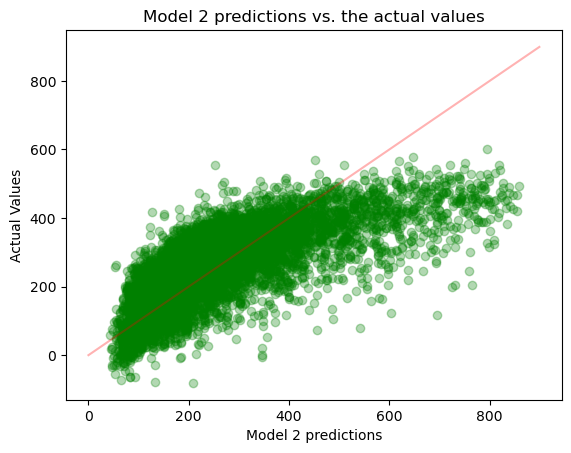

In [43]:

#### Plot the predictions
# Build a scatterplot
plt.scatter(y_test2, y_te_pred2, color='g', alpha=.3)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot(range(0,900), range(0, 900), color='r', alpha=.3)

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel('Model 2 predictions')
plt.ylabel('Actual Values')


In [44]:
#Calculating R squared for this OLS method for the test dataset
r2_score(y_test2, y_te_pred2)

0.5536393988832773

In [46]:
mean_absolute_error(y_test2, y_te_pred2)

68.06577408313612

In [48]:
mse2 = mean_squared_error(y_test2, y_te_pred2)
mse2

8882.046856362795

In [49]:
np.sqrt(mse2)

94.24461181607569

<font size ='4'> 

Please ignore the below section below the parentheses. I realized my feature coefficients are seemingly 'irrationally large' because it was outputting f-statistics. And for this many features/data, the f-stat should be large. 

Furthermore, I should not be using SelectKBest because it assumes normal distribution of the underlying datasets. The features in my dataset are not normally distributed (although I do incorrectly use StandardScaler...), and thus, these f-statistic outputs are meaningless. 

<font size="3">
    
(Please ignore this section, just keeping it for records)
    
Creating a pipeline for GridSearchCV to determine the optimal number of features for this Linear Regression Model:

In the below steps, I am aggregating the stages of StandardScaler, SelectKBest, and Linear Regression into one process using make_pipeline. 

In [65]:
#Creating the pipeline
#Note, SelectKBest defaults to k=10 if no K is given, which is the case below
pipe10 = make_pipeline( 
    StandardScaler(),
    SelectKBest(f_regression, k=25),
    LinearRegression())

In [66]:
#Fitting the pipeline to the training dataset
pipe10.fit(x_train, y_train)

C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=25,
                             score_func=<function f_regression at 0x0000024BBC80E790>)),
                ('linearregression', LinearRegression())])

In [67]:
#Predicting the training and test datasets
y_tr_pred3 = pipe10.predict(x_train)
y_te_pred3 = pipe10.predict(x_test)

In [68]:
#Calculating the R squared metrics for both the training and test datasets to test the pipeline
#Keep in mind, SelectKBest defaults to k=10 for these calculations
r2_score(y_train, y_tr_pred3), r2_score(y_test, y_te_pred3), 

(0.5512857258287878, 0.547592903196622)

<font size="3">

(Please ignore this section, just for my records)
    
The below steps processes the pipeline with cross_validation to create a more robust evaluation of the model

In [79]:
cv_results = cross_validate(pipe10, x_train_scaled, y_train, cv=5)

C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [80]:
cv_scores = cv_results['test_score']
cv_scores

array([0.54534514, 0.55619165, 0.54768672, 0.54986138, 0.55458822])

In [81]:
#Calculating mean and std of the results
np.mean(cv_scores), np.std(cv_scores)

(0.5507346238495285, 0.004092143139266093)

In [82]:
#Calculating the 95% confidence interval of the results
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.54, 0.56])

In [83]:
#Outputting the parameters to the model
pipe10.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize', 'linearregression__positive'])

<font size="3">

(Please ignore these below steps, they output f-statistic measures, which are meaningless)
    
The below steps initiates GridSearchCV to determine the optimal number of features (k) for the linear regression model

In [69]:
#Initiating GridSearchCV
k = [k+1 for k in range(len(x_train.columns))]
grid_params = {'selectkbest__k': k}

In [71]:
lr_grid_cv = GridSearchCV(pipe10, param_grid=grid_params, cv=5, n_jobs=-1)

In [72]:
#Fitting the process and model to the training dataset
lr_grid_cv.fit(x_train, y_train)

C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=25,
                                                    score_func=<function f_regression at 0x0000024BBC80E790>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [73]:
#Creating th performance variables
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [89]:
score_mean

array([0.17846278, 0.18132853, 0.36519629, 0.40633588, 0.4063412 ,
       0.45347604, 0.46407331, 0.46414914, 0.46561495, 0.46697907,
       0.47738717, 0.49023915, 0.49634977, 0.50262792, 0.50262657,
       0.52710959, 0.52710857, 0.52711344, 0.52713017, 0.53165775,
       0.53675572, 0.53844065, 0.53901737, 0.55065538, 0.5506813 ,
       0.5529837 , 0.55470209, 0.554727  , 0.55459323, 0.55184385,
       0.55322603, 0.55613637, 0.55622598, 0.55645059, 0.55479387,
       0.55685328])

In [90]:
score_std

array([0.00706874, 0.00686021, 0.0080447 , 0.00635795, 0.00636164,
       0.00725033, 0.00593645, 0.0059    , 0.00595323, 0.0053048 ,
       0.00555253, 0.00569594, 0.00496983, 0.00536795, 0.00536677,
       0.0045517 , 0.00455025, 0.00455399, 0.00456321, 0.00424929,
       0.0045756 , 0.00442205, 0.00438396, 0.00399415, 0.00401374,
       0.00341965, 0.00431315, 0.0042723 , 0.00438096, 0.00755917,
       0.00590468, 0.00507375, 0.0050091 , 0.00447074, 0.00653647,
       0.00427154])

In [91]:
#Outputting the optimal number of features to utilize in the linear regression model
lr_grid_cv.best_params_

{'selectkbest__k': 36}

<font size="3">

(This output is still valid)
    
Let's create a chart to visualize the relationship between performance of the model (R-squared) vs # of features (k)

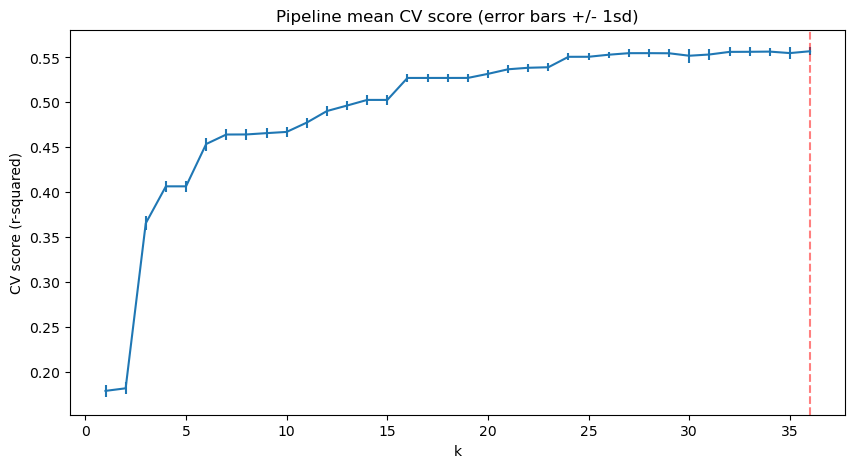

In [92]:
#Creating a visualization to showcase R-squared vs # of features (k) utilized in the model
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

<font size="3">

The graph illustrates the tremendous marginal increase in model performance from 1 to 6 features. However, following 6 features, the model only marginally treads higher in performance up to the last feature. 

Although best_params outputs the optimal feature number as 36 (all of the features), a strong case can be made for utilizing only 25 features, since there is nearly an insignificant model performance increase between 25 to 36 features. 

Similarly, a case can also be made to utilize only 16 features, since the largest marginal increases in model performance ceases after 16.


HMMMM

In [93]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

In [94]:
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
coefs

array([[ 2.98111615e+01,  8.86491349e+00, -3.53718710e-02,
         2.22975239e+01, -1.19446673e+01, -4.31725967e+00,
         2.12614500e+01,  1.19448330e+01,  1.56661940e+14,
        -9.39910831e+13, -2.56888147e+14,  2.31782440e+14,
         1.54292570e+12, -2.58677272e+12,  2.58677272e+12,
        -1.54292570e+12,  1.12026874e+00,  7.28170491e+00,
         1.61635285e+01,  3.02493747e+00,  2.01053267e+14,
         1.16260019e+14,  2.10267955e+14, -1.35115969e+14,
         3.42972235e+13, -6.71424186e+13, -1.24520853e+13,
         8.91560436e+12,  3.42972235e+13, -6.71424186e+13,
        -1.12944394e+14, -9.71872344e+13, -1.93336418e+14,
        -1.69800652e+12,  3.81843938e+13, -1.26926392e+14]])

In [96]:
#Note, I needed to create my own coefs2 variable to create the same value length as the index
#I did so by deleting the extra brackets from the 'coefs' variable above
coefs2 = [2.98111615e+01,  8.86491349e+00, -3.53718710e-02,
         2.22975239e+01, -1.19446673e+01, -4.31725967e+00,
         2.12614500e+01,  1.19448330e+01,  1.56661940e+14,
        -9.39910831e+13, -2.56888147e+14,  2.31782440e+14,
         1.54292570e+12, -2.58677272e+12,  2.58677272e+12,
        -1.54292570e+12,  1.12026874e+00,  7.28170491e+00,
         1.61635285e+01,  3.02493747e+00,  2.01053267e+14,
         1.16260019e+14,  2.10267955e+14, -1.35115969e+14,
         3.42972235e+13, -6.71424186e+13, -1.24520853e+13,
         8.91560436e+12,  3.42972235e+13, -6.71424186e+13,
        -1.12944394e+14, -9.71872344e+13, -1.93336418e+14,
        -1.69800652e+12,  3.81843938e+13, -1.26926392e+14]

In [97]:
features = x_train.columns[selected]
pd.Series(coefs2, index=features).sort_values(ascending=True)

Pop Density (ppl/km2)      -2.568881e+14
Country_Hungary            -1.933364e+14
city_lisbon                -1.351160e+14
Country_Spain              -1.269264e+14
Country_Germany            -1.129444e+14
Country_Greece             -9.718723e+13
Population                 -9.399108e+13
city_paris                 -6.714242e+13
Country_France             -6.714242e+13
city_rome                  -1.245209e+13
Room Type_Shared room      -2.586773e+12
Country_Italy              -1.698007e+12
Private Room_True          -1.542926e+12
dist                       -1.194467e+01
metro_dist                 -4.317260e+00
guest satis rating         -3.537187e-02
Superhost?_True             1.120269e+00
Weekday/Weekend_weekends    3.024937e+00
Multi Listing?_1            7.281705e+00
cleanliness_rating          8.864913e+00
Rest Index                  1.194483e+01
Biz Listing?_1              1.616353e+01
attr_index                  2.126145e+01
bedrooms                    2.229752e+01
Person Capacity 

In [118]:
#Initiating GridSearchCV
k = [k+1 for k in range(len(x_train.columns))]
grid_params = {'selectkbest__k': k}

In [119]:
lr = LinearRegression()

In [120]:
lr_grid_cv = GridSearchCV(lr, param_grid=grid_params, cv=5, n_jobs=-1)

In [121]:
lr_grid_cv.fit(x_train_scaled, y_train)

ValueError: Invalid parameter selectkbest for estimator LinearRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
#Creating th performance variables
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

<font size="3">

Creating a Random Forest Model

In [9]:
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=47))

In [10]:
#I'm inserting hashtag in front of below code so that it doesn't run whenever I restart this kernel, because the below code is time intensive
#rf_default_cv_results = cross_validate(RF_pipe, x_train, y_train, cv=5)

C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was ex

In [11]:
#rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.78968218, 0.79695471, 0.77960815, 0.7794528 , 0.79290299])

In [12]:
#n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
#grid_params = {
#        'randomforestregressor__n_estimators': n_est,
#        'standardscaler': [StandardScaler(), None],
#}
#grid_params

{'randomforestregressor__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'standardscaler': [StandardScaler(), None]}

In [13]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [14]:
#rf_grid_cv.fit(x_train, y_train)        

C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'standardscaler': [StandardScaler(), None]})

In [15]:
#rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 1000,
 'standardscaler': StandardScaler()}

In [16]:
#Again, I'm inserting hashtag in front of below codes so that it doesn't run whenever I restart this kernel, because the below code is time intensive
#Computing cross-validated r-squared results
#rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, x_train, y_train, cv=5)
#rf_best_scores = rf_best_cv_results['test_score']
#rf_best_scores

C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was ex

array([0.79263712, 0.79991216, 0.78189394, 0.78158688, 0.79654354])

<font size="3">
    
Despite the poorly constructed training dataset, the Random Forest model was able to produce a high r-squared output. 
    
Let's determine the underlying logic behind the regression mechanism by viewing feature importance

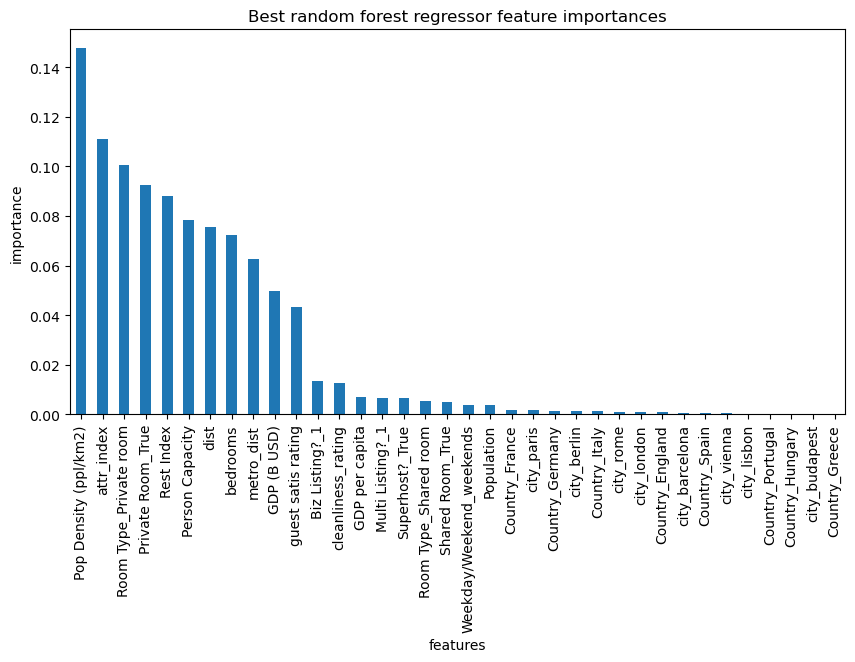

In [17]:
#plt.subplots(figsize=(10, 5))
#imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
#rf_feat_imps = pd.Series(imps, index=x_train.columns).sort_values(ascending=False)
#rf_feat_imps.plot(kind='bar')
#plt.xlabel('features')
#plt.ylabel('importance')
#plt.title('Best random forest regressor feature importances');

<font size="3">
Lets compare the performance metrics of the Linear Regression model vs the Random Forest model

In [74]:
#lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, x_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [75]:
#lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
#lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
#lr_mae_mean, lr_mae_std

(67.6190974689903, 0.5570714393409927)

In [76]:
#Calculating MAE of the linear model with the test set
#This MAE corresponds with the previously computed MAE of $69
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(x_test))

69.04017008755508

<font size="3">

The linear model's MAE equates to around $69

<font size ="3">

Let's calculate these same metrics for the Random Forest Model

In [77]:
#rf_neg_mae = cross_validate(rf_grid_cv.best_estimator_, x_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [78]:
#rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
#rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
#rf_mae_mean, rf_mae_std

(41.07484802414621, 0.5157821604482974)

In [79]:
mean_absolute_error(y_test, rf_grid_cv.best_estimator_.predict(x_test))

37.3714854366154

<font size ="4">

Creating Random Forest Regressor without Pipeline

In [19]:
param_grid = {
    'n_estimators': [25,50,100,125,150], 
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]}

In [20]:
rf_classifier = RandomForestRegressor(random_state=44)
grid_searchrf = GridSearchCV(rf_classifier, param_grid, cv=5)

In [ ]:
#I'm inserting hashtag in front of below code so that it doesn't run whenever I restart this kernel, because the below code is time intensive
#grid_searchrf.fit(x_train_scaled, y_train)

Outputting best parameters for the model


In [56]:

best_paramsrf = grid_searchrf.best_params_
best_paramsrf

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}

In [24]:
best_modelrf = grid_searchrf.best_estimator_

In [50]:
best_modelrf

RandomForestRegressor(n_estimators=150, random_state=44)

Predicting model on the train dataset

In [27]:

y_tr_pred_rf = best_modelrf.predict(x_train_scaled)

Computing performance metrics on the model

In [28]:
#r2_score(y_train, y_tr_pred_rf)

0.975069682984893

In [29]:
#mean_absolute_error(y_train, y_tr_pred_rf)

13.910519431596029

In [30]:
#mean_squared_error(y_train, y_tr_pred_rf)

495.83661054127754

In [31]:
#np.sqrt(495.83661054127754)

22.267388947545637

Predicting trained model on test dataset

In [32]:
y_predrf = best_modelrf.predict(x_test_scaled)

Computing performance metrics on test dataset

In [33]:
#r2_score(y_test, y_predrf)


0.8311570772098817

In [34]:
#mean_absolute_error(y_test, y_predrf)

37.43943899451996

In [35]:
#mean_squared_error(y_test, y_predrf)

3463.8218639952993

In [36]:
#np.sqrt(3463.8218639952993)

58.854242531828575

There is a significant drop of the R-squared metric suggesting that fine-tuning the model can decrease the overfitting (by balancing the bias/variance tradeoff)

<font size ="4">
    
My random forest regressor performs better when not fitted within a pipeline (I am not sure why). But nonetheless, random forest model remains the best model for this case study.

Let's plot the feature importances again to verify it is the same as the pipeline-fitted Random Forest Model

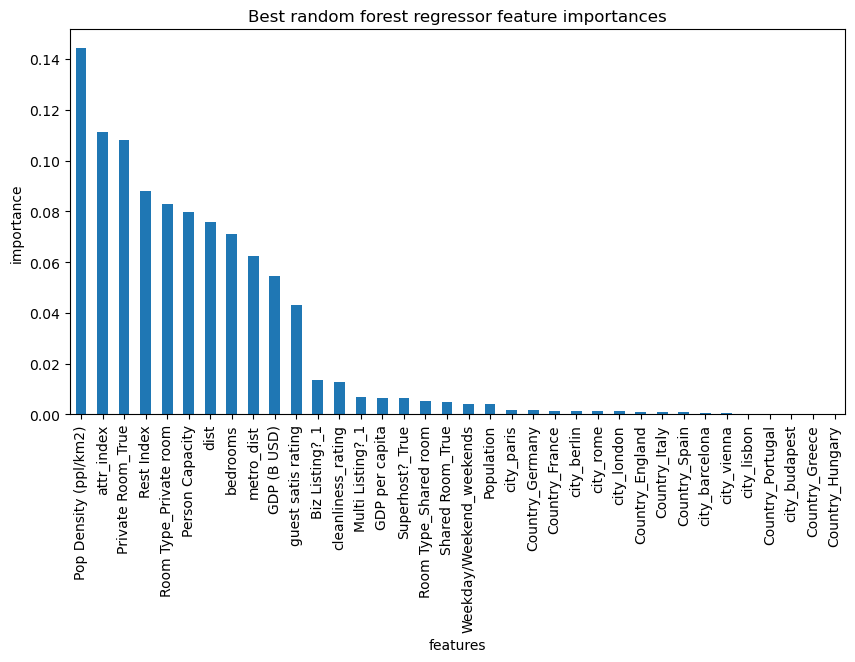

In [55]:
#Again, I'm inserting hashtag in front of below code so that it doesn't run whenever I restart this kernel, because the below code is time intensive
#plt.subplots(figsize=(10, 5))
#imps2 = grid_searchrf.best_estimator_.feature_importances_
#rf_feat_imps = pd.Series(imps2, index=x_train.columns).sort_values(ascending=False)
#rf_feat_imps.plot(kind='bar')
#plt.xlabel('features')
#plt.ylabel('importance')
#plt.title('Best random forest regressor feature importances');

The non-pipeline fitted Random Forest model feature importance is indeed the same

<font size = "4">
    
Creating Gradient Boost Regressor Model

In [111]:
#Again, I'm inserting hashtag in front of below code so that it doesn't run whenever I restart this kernel, because the below code is time intensive
#gbregressor = GradientBoostingRegressor()
#gbregressor.fit(x_train_scaled, y_train)


C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Mark Lee\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [115]:

y_predgb = gbregressor.predict(x_test_scaled)


In [116]:
#r2_score(y_test, y_predgb)

0.659024533267661

In [117]:
#mae = mean_absolute_error(y_test, y_predgb)
#mae

57.06770439253024

In [118]:
#mse = mean_squared_error(y_test, y_predgb)
#mse

6995.130487178478

In [124]:
#np.sqrt(mse)

83.63689668548491

<font size ="3">

It's interesting that Gradient Boost does not perform as well as Random Forest, but this is most likely due to the significant "noise" of the (poorly feature engineered) dataset. For in gradient boost, one decision tree is iterated and optimized with new residuals, and thus, does not optimize across a spread of decision tree computations. But in Random Forest, many decision trees are computed and spread across many iterations and can account for the extreme noise in this dataset. 
    

KNN REGRESSOR MODEL


(Please ignore this section below ... just for my notes)

In [61]:
#This model used unscaled x_train data, and thus, was removed, but keeping it here for my notes
#param_grid = {'n_neighbors':np.arange(1,50)}
#knn = neigh = KNeighborsRegressor()
#knn_cv= GridSearchCV(knn,param_grid,cv=5)
#knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [62]:
#print("Best Score:" + str(knn_cv.best_score_))
#print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.4114149964627227
Best Parameters: {'n_neighbors': 1}


(Can begin reading here again) 

Creating KNN Model using scaled data

In [63]:
#KNN using scaled x_train data
#Again, I'm inserting hashtag in front of below code so that it doesn't run whenever I restart this kernel, because the below code is time intensive
#param_grid = {'n_neighbors':np.arange(1,50)}
#knn = neigh = KNeighborsRegressor()
#knn_cv= GridSearchCV(knn,param_grid,cv=5)
#knn_cv.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [64]:
#print("Best Score:" + str(knn_cv.best_score_))
#print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.6466467435754633
Best Parameters: {'n_neighbors': 16}


The R-squared for KNN of .64 is lower than Random Forest's

KNN is normally suited for classification problems, so I'm not surprised it does not perform as well Random Forest. What's surprising, is it does perform better than Linear Regression.

<font size="3">

Overall analysis:



Most conspiculously: Random Forest regression computes feature importance that is contradictory to the linear regression model.

Of note:
Let's remember the training dataset contained an aggregate of all cities as respective features for each datapoint (as previously stated and cautioned). Thus, the random forest aggregator most likely (and correctly) predicted that each respective city - especially respective cities' economic prosperity - are main components towards AirBNB prices; More simply, higher city GDP equates to higher AirBnb room prices, for obviously hosts can charge higher room prices in more expensive cities. This relationship is reflected in Random Forest's feature importance, where "Pop Density" - which roughly correlates to cities' GDP in this training set - and "GDP" are both important features. 

Notable contradictions between Linear Regression vs the Random Forest models are the features "Room Type_Private" and "Biz Listing(?)." In fact, they represent opposite significance in each respective model. 

Overall:
Again, (although I'm beating a dead drum...) let's remember that the training dataset was poorly constructed for respective cities were feature-engineered into the dataset as variables of the host's AirBnb room, whereas it's more logical to compute regression models of AirBnb room features separately for each city. 

However, it's interesting that Random Forest regression is able to detect the significance of city on the price of the AirBnb rooms, albeit indirectly via the feature-engineered GDP variable, and with remarkable accuracy (r-squared ~.79). Given the high r-squared metric, coupled with lower MAE ($37 vs. $69). These metrics suggest a tremendous performance boost by utilzing the Random Forest model.

If forced to use these regression models as is (without levity to re-construct the training dataset features), the Random Forest model is the obvious choice. Airbnb hosts can benefit from this analysis by grasping the importance of these features, in order of significance:
1. Attr - Index (room proximity to attractions)
2. Private rooms are significantly valued
3. Rest-Index (proxmity to valuable restaurants)
4. Person Capacity - # of person the entire room/apt/house can hold
5. Dist (distance from city center), which correlates with distance from attraction
6. Bedrooms
7. Distance from Metro
8. Guest - Satisfaction

Admittedly, these modeled insights, for the most part, simply follow common sense reasoning, but this regression model certifies conventional wisdom towards determinants of Airbnb prices. 
